<a href="https://colab.research.google.com/github/SamB83/TFforAIGooColab/blob/master/IMDBSub8KwMultiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer LSTM

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [2]:
# If the tf.__version__ is 1.x, please run this cell
!pip install tensorflow==2.0.0-beta0

    100% |████████████████████████████████| 87.9MB 112kB/s 
    100% |████████████████████████████████| 501kB 5.0MB/s 
    100% |████████████████████████████████| 61kB 11.4MB/s 
    100% |████████████████████████████████| 3.1MB 2.9MB/s 
    100% |████████████████████████████████| 583kB 3.6MB/s 
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


W0705 21:28:51.318682 140735985201984 deprecation.py:323] From /Users/samarth/anaconda/envs/ipykernel_py3/lib/python3.7/site-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/samarth/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [3]:
print(tf.compat.v1.data.get_output_classes(train_dataset))

(<class 'tensorflow.python.framework.ops.Tensor'>, <class 'tensorflow.python.framework.ops.Tensor'>)


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [12]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


W0705 21:35:43.280809 140735985201984 deprecation.py:323] From /Users/samarth/anaconda/envs/ipykernel_py3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 2508s 6s/step - loss: 0.5883 - accuracy: 0.6862 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 3393s 9s/step - loss: 0.4204 - accuracy: 0.8200 - val_loss: 0.4769 - val_accuracy: 0.7820
Epoch 3/10
391/391 [==============================] - 1959s 5s/step - loss: 0.3263 - accuracy: 0.8689 - val_loss: 0.4764 - val_accuracy: 0.8159
Epoch 4/10
391/391 [==============================] - 1769s 5s/step - loss: 0.3535 - accuracy: 0.8512 - val_loss: 0.4461 - val_accuracy: 0.8281
Epoch 5/10
391/391 [==============================] - 1745s 4s/step - loss: 0.2581 - accuracy: 0.9014 - val_loss: 0.4709 - val_accuracy: 0.8158
Epoch 6/10
391/391 [==============================] - 1726s 4s/step - loss: 0.2066 - accuracy: 0.9237 - val_loss: 0.4785 - val_accuracy: 0.8164
Epoch 7/10
391/391 [==============================] - 1724s 4s/step - loss: 0.1602 - accuracy: 0.9436 - val_loss: 0.4961 - val_accuracy: 0.

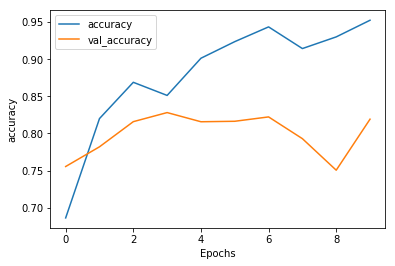

In [13]:
plot_graphs(history, 'accuracy')

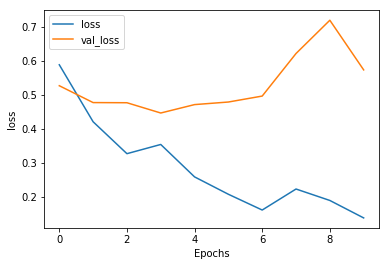

In [14]:
plot_graphs(history, 'loss')